<a href="https://colab.research.google.com/github/aditi0356/Paisabazaar_aditiMLCreditscoremodelling/blob/main/Paisabazaar_CreditScore_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step-1 Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import scipy.stats as stats
import re, string
print("Libraries Imported")


Libraries Imported


Step-2 Load the dataset

In [ ]:
# Load dataset (upload dataset-2.csv to Colab first using left-side upload button)
df = pd.read_csv("/dataset-2.csv")

# First look
print("\nFirst 5 rows:\n", df.head())
print("\nShape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())

# Count rows & columns
print(f"\nDataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Check duplicates
print("\nDuplicate Values:", df.duplicated().sum())

# Check missing/null
print("\nMissing Values:\n", df.isnull().sum())


First 5 rows:
      ID  Customer_ID  Month           Name  Age        SSN Occupation  \
0  5634         3392      1  Aaron Maashoh   23  821000265  Scientist   
1  5635         3392      2  Aaron Maashoh   23  821000265  Scientist   
2  5636         3392      3  Aaron Maashoh   23  821000265  Scientist   
3  5637         3392      4  Aaron Maashoh   23  821000265  Scientist   
4  5638         3392      5  Aaron Maashoh   23  821000265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                  3  ...        Good   
1       19114.12            1824.843333                  3  ...        Good   
2       19114.12            1824.843333                  3  ...        Good   
3       19114.12            1824.843333                  3  ...        Good   
4       19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \
0 

Step-2 understanding variables

In [ ]:
# Basic description
print("\nData Description:\n", df.describe(include="all"))

# Variable types
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nCategorical Variables:", cat_cols)
print("\nNumerical Variables:", num_cols)

# Unique values in each variable
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Data Description:
                    ID    Customer_ID          Month      Name            Age  \
count   100000.000000  100000.000000  100000.000000    100000  100000.000000   
unique            NaN            NaN            NaN     10128            NaN   
top               NaN            NaN            NaN  Jessicad            NaN   
freq              NaN            NaN            NaN        48            NaN   
mean     80631.500000   25982.666640       4.500000       NaN      33.316340   
std      43301.486619   14340.543051       2.291299       NaN      10.764812   
min       5634.000000    1006.000000       1.000000       NaN      14.000000   
25%      43132.750000   13664.500000       2.750000       NaN      24.000000   
50%      80631.500000   25777.000000       4.500000       NaN      33.000000   
75%     118130.250000   38385.000000       6.250000       NaN      42.000000   
max     155629.000000   50999.000000       8.000000       NaN      56.000000   

                 SS

step-3 data wrangling

In [ ]:
# Drop identifiers
drop_cols = ["ID", "Customer_ID", "Name", "SSN", "Month"]
df.drop(columns=drop_cols, inplace=True, errors="ignore")

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# Fill missing numeric with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical with mode
for col in cat_cols:
    if df[col].isnull().sum() > 0:   # only apply if missing exists
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\n Missing values handled successfully")

# Insight
print("\nInsight: After wrangling, dataset is clean and ready for EDA.")




 Missing values handled successfully

Insight: After wrangling, dataset is clean and ready for EDA.


Step-4 Data visualization

Chart-1 Bar Chart

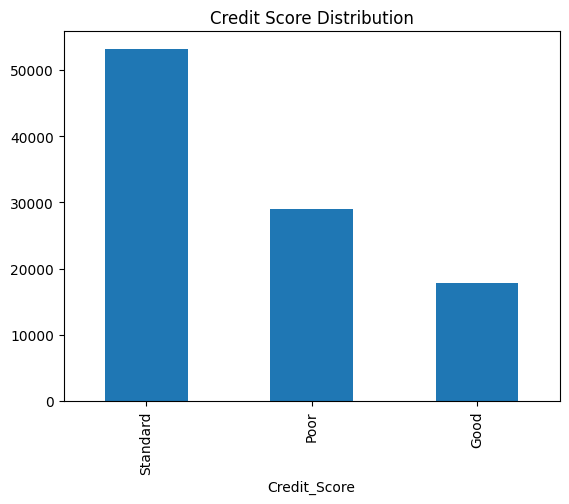

In [ ]:
# Chart-1: Credit Score distribution
df["Credit_Score"].value_counts().plot(kind="bar", title="Credit Score Distribution")
plt.show()

Chart-2 Histogram

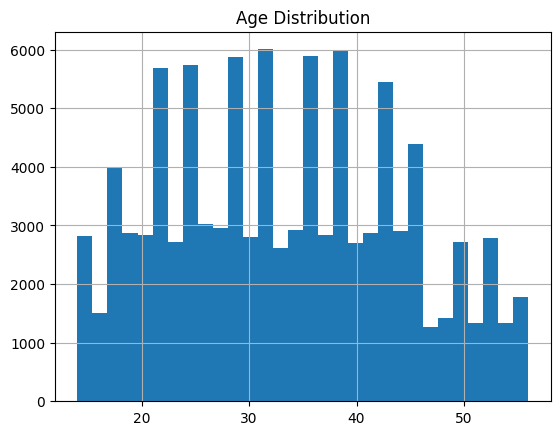

In [ ]:
# Chart-2: Histogram of Age
df["Age"].hist(bins=30)
plt.title("Age Distribution")
plt.show()

Chart-3 line plot

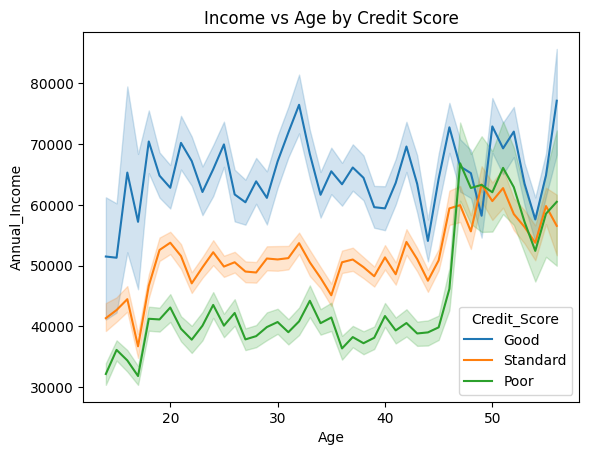

In [ ]:
# Chart-3: Line plot Income vs Credit_Score
sns.lineplot(x="Age", y="Annual_Income", data=df, hue="Credit_Score")
plt.title("Income vs Age by Credit Score")
plt.show()

Chart-4 Scatter plot

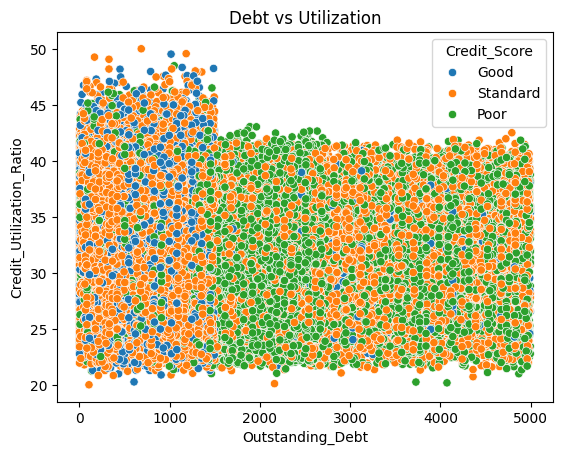

In [ ]:
sns.scatterplot(x="Outstanding_Debt", y="Credit_Utilization_Ratio", hue="Credit_Score", data=df)
plt.title("Debt vs Utilization")
plt.show()

Chart-5 Histogram of Annual income

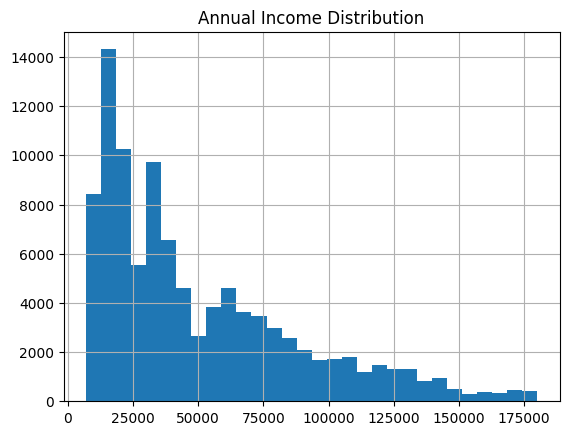

In [ ]:
# Chart-5: Histogram of Annual Income
df["Annual_Income"].hist(bins=30)
plt.title("Annual Income Distribution")
plt.show()

Chart-6 Occupation vs Credit score

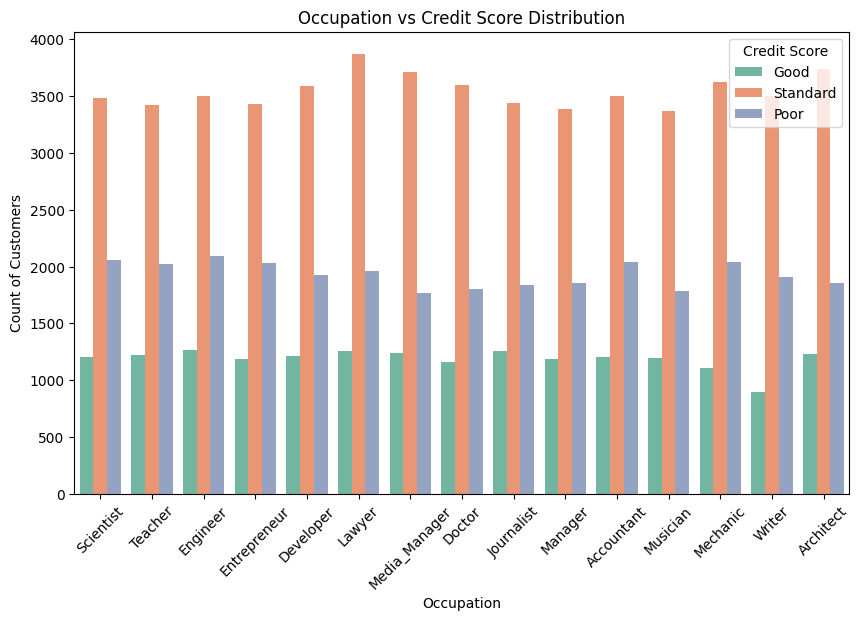

In [ ]:
# -------- Chart 6: Occupation vs Most Frequent Credit Score --------
plt.figure(figsize=(10,6))

# Compute most frequent Credit Score per Occupation
mode_scores = df.groupby("Occupation")["Credit_Score"].agg(lambda x: x.mode()[0]).reset_index()

# Plot bar chart
sns.countplot(x="Occupation", hue="Credit_Score", data=df, palette="Set2")

plt.title("Occupation vs Credit Score Distribution")
plt.xticks(rotation=45)
plt.ylabel("Count of Customers")
plt.xlabel("Occupation")
plt.legend(title="Credit Score")
plt.show()


Chart-7 Annual Income Vs Monthly Inhand Salary

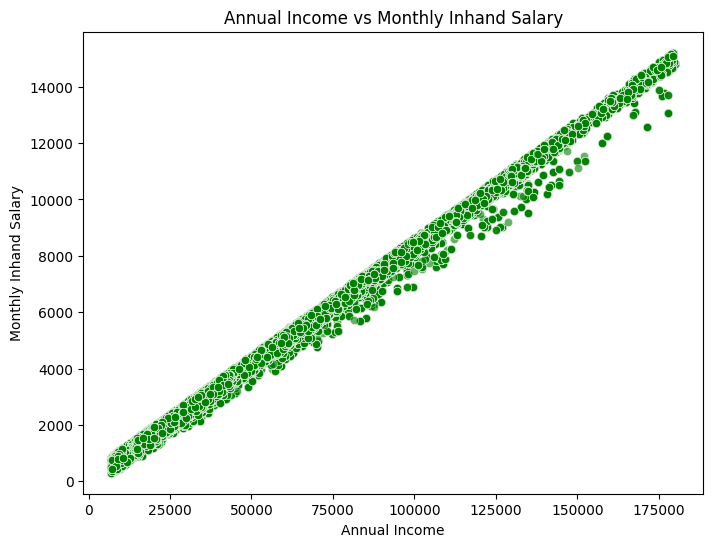

In [ ]:
# -------- Chart 7: Annual Income vs Monthly Inhand Salary --------
plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual_Income", y="Monthly_Inhand_Salary", data=df, alpha=0.6, color="green")
plt.title("Annual Income vs Monthly Inhand Salary")
plt.xlabel("Annual Income")
plt.ylabel("Monthly Inhand Salary")
plt.show()

Chart-8 Credit Score vs number of loans

/tmp/ipython-input-3435395168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Credit_Score", y="Num_of_Loan", data=df, palette="Set2")


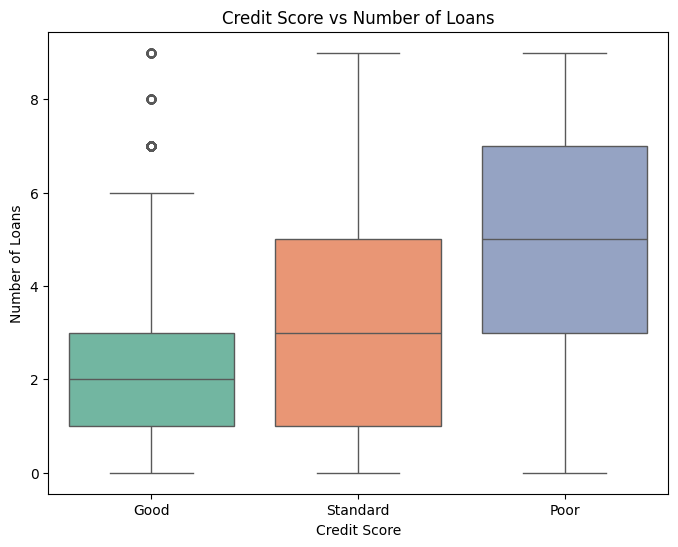

In [ ]:
# -------- Chart 8: Credit Score vs Number of Loans --------
plt.figure(figsize=(8,6))
sns.boxplot(x="Credit_Score", y="Num_of_Loan", data=df, palette="Set2")
plt.title("Credit Score vs Number of Loans")
plt.xlabel("Credit Score")
plt.ylabel("Number of Loans")
plt.show()

Chart-9 Boxplot Income vs Credit score

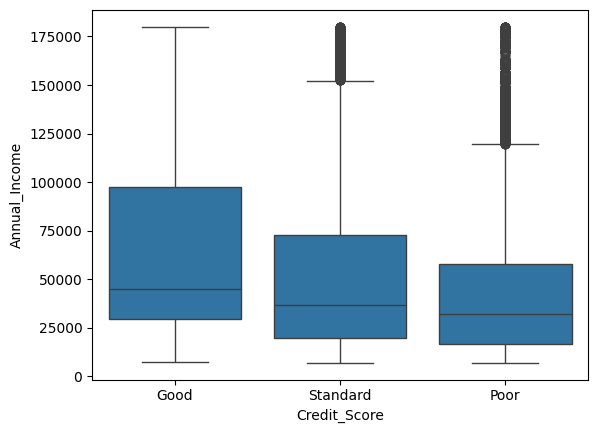

In [ ]:
# Chart-9: Boxplot Income vs Credit Score
sns.boxplot(x="Credit_Score", y="Annual_Income", data=df)
plt.show()

Chart-10 Boxplot debt vs credit score

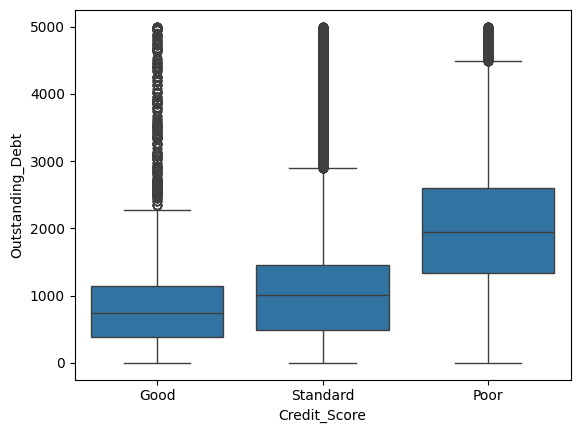

In [ ]:
sns.boxplot(x="Credit_Score", y="Outstanding_Debt", data=df)
plt.show()


Chart-11 KDE Plot Age

/tmp/ipython-input-2617416529.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Age"], shade=True)


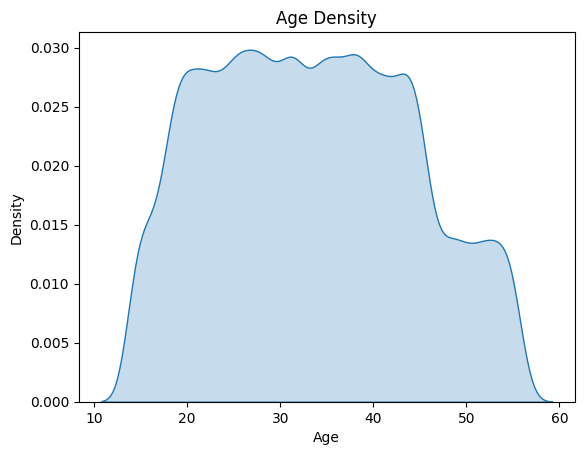

In [ ]:
sns.kdeplot(df["Age"], shade=True)
plt.title("Age Density")
plt.show()

Chart-12 Countplot Occupation

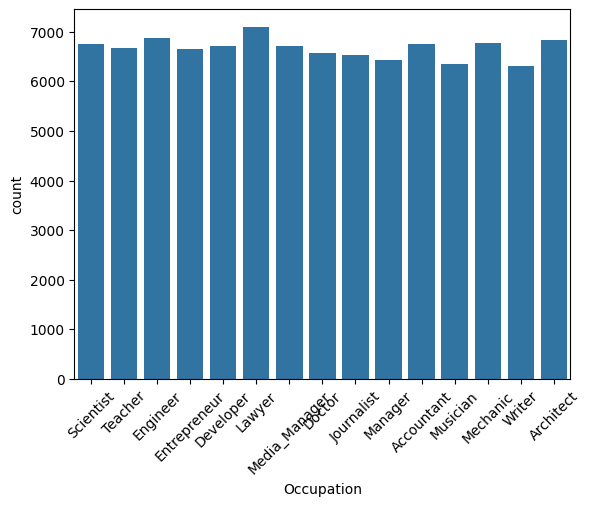

In [ ]:
# Chart-12: Countplot Occupation
sns.countplot(x="Occupation", data=df)
plt.xticks(rotation=45)
plt.show()

Chart-13 Barplot Loan Default vs Credit Score

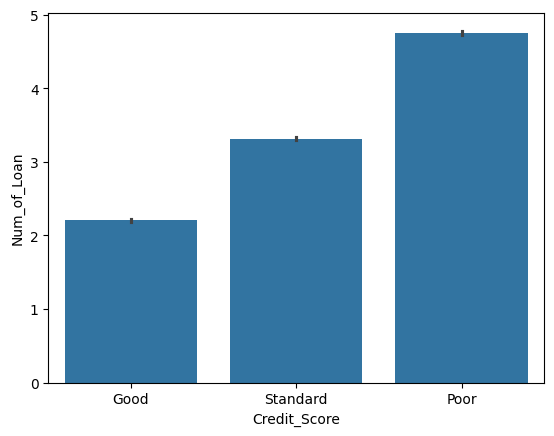

In [ ]:
sns.barplot(x="Credit_Score", y="Num_of_Loan", data=df)
plt.show()

Chart-14 Correlation Heatmap

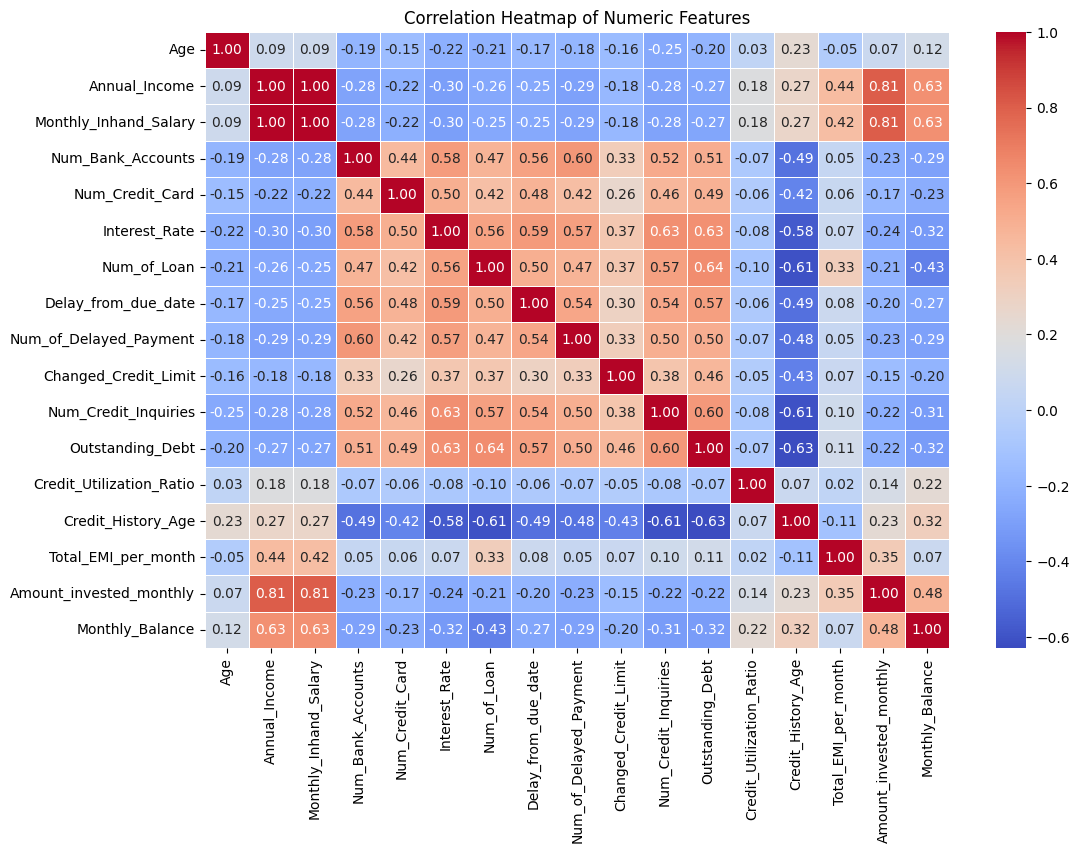

In [ ]:
# -------- Chart-14: Correlation Heatmap --------
plt.figure(figsize=(12,8))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Chart-15 Pair plot

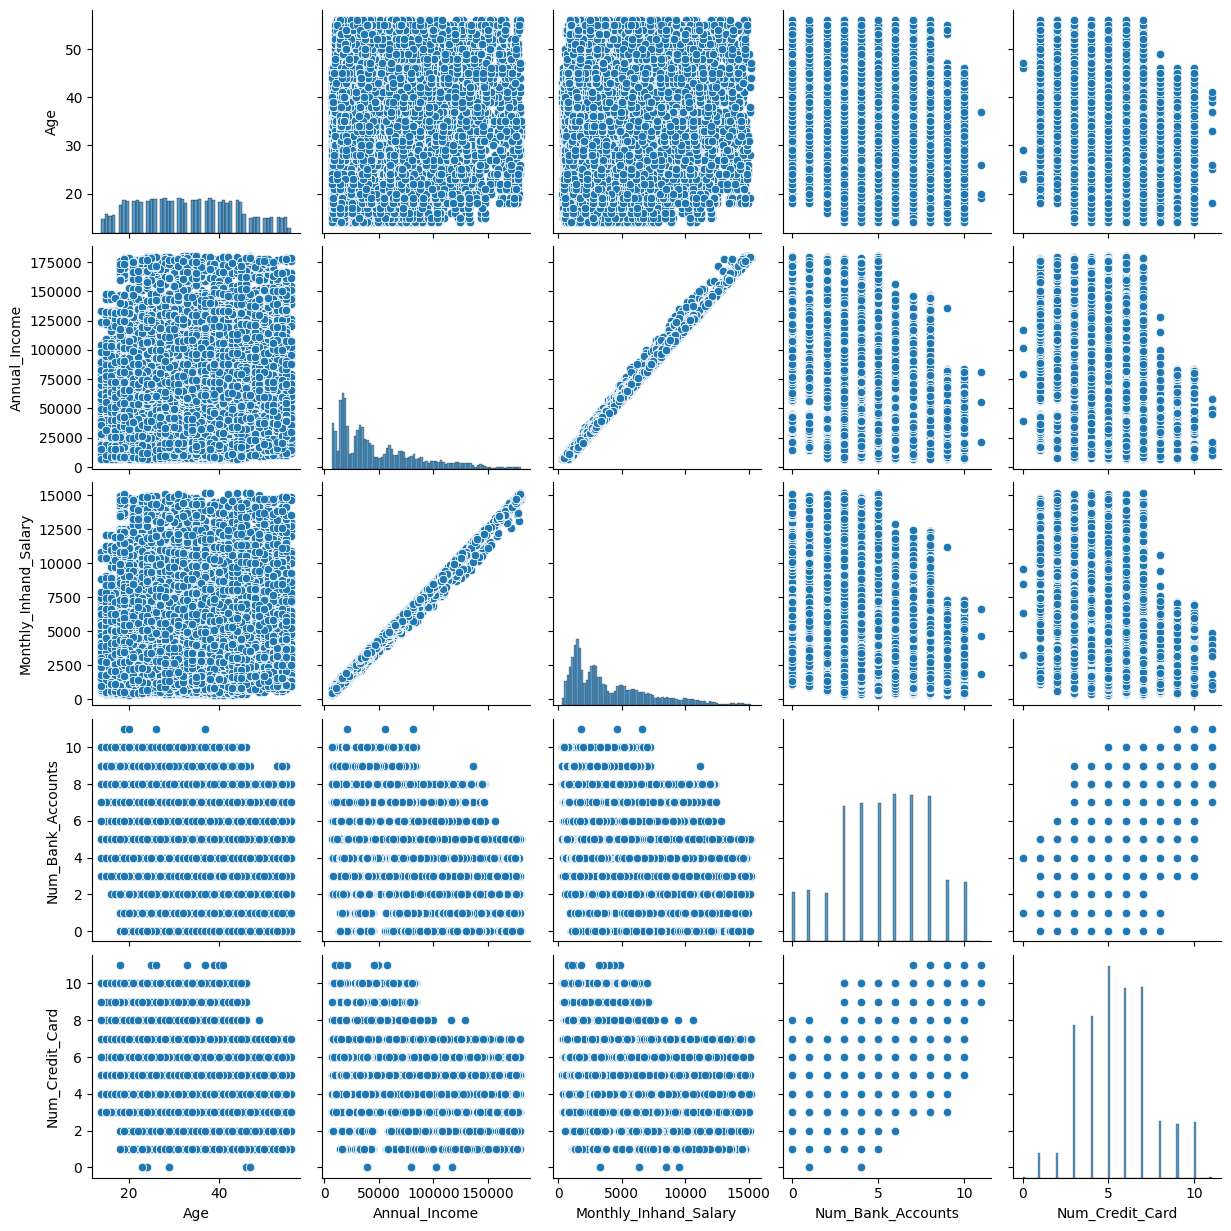

In [ ]:
sns.pairplot(df[num_cols[:5]])  # only first 5 numeric columns
plt.show()

Step-5 Hypothesis testing
# --- Hypothesis 1: Does Annual Income differ across Credit_Score categories? ---
# H0: There is no significant difference in Annual_Income across Credit_Score groups
# H1: There is a significant difference in Annual_Income across Credit_Score groups


In [ ]:
# --- Hypothesis 1: Does Annual Income differ across Credit_Score categories? ---
# H0: There is no significant difference in Annual_Income across Credit_Score groups
# H1: There is a significant difference in Annual_Income across Credit_Score groups
anova_income = stats.f_oneway(
    df[df['Credit_Score']=="Poor"]['Annual_Income'],
    df[df['Credit_Score']=="Standard"]['Annual_Income'],
    df[df['Credit_Score']=="Good"]['Annual_Income']
)
print("Hypothesis 1 - ANOVA Test: Annual_Income vs Credit_Score")
print("F-statistic:", anova_income.statistic, "  p-value:", anova_income.pvalue)
if anova_income.pvalue < 0.05:
    print("Reject H0 → Annual Income differs significantly across Credit Score groups.\n")
else:
    print("Fail to Reject H0 → No significant difference in Annual Income across Credit Score groups.\n")

Hypothesis 1 - ANOVA Test: Annual_Income vs Credit_Score
F-statistic: 2399.806708654421   p-value: 0.0
Reject H0 → Annual Income differs significantly across Credit Score groups.



# --- Hypothesis 2: Is there a relationship between Occupation and Credit_Score? ---
# H0: Occupation and Credit_Score are independent (no association)
# H1: Occupation and Credit_Score are dependent (significant association)


In [ ]:
# --- Hypothesis 2: Is there a relationship between Occupation and Credit_Score? ---
# H0: Occupation and Credit_Score are independent (no association)
# H1: Occupation and Credit_Score are dependent (significant association)

contingency_table = pd.crosstab(df['Occupation'], df['Credit_Score'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Hypothesis 2 - Chi-Square Test: Occupation vs Credit_Score")
print("Chi2:", chi2, "  p-value:", p)
if p < 0.05:
    print("Reject H0 → Occupation and Credit_Score are associated.\n")
else:
    print("Fail to Reject H0 → Occupation and Credit_Score are independent.\n")

Hypothesis 2 - Chi-Square Test: Occupation vs Credit_Score
Chi2: 180.68588839512742   p-value: 2.907103747503745e-24
Reject H0 → Occupation and Credit_Score are associated.



# --- Hypothesis 3: Does the average Age differ between people who pay minimum due and those who don’t? ---
# H0: No significant difference in Age between Payment_of_Min_Amount groups
# H1: Significant difference in Age between Payment_of_Min_Amount groups

In [ ]:
# --- Hypothesis 3: Does the average Age differ between people who pay minimum due and those who don’t? ---
# H0: No significant difference in Age between Payment_of_Min_Amount groups
# H1: Significant difference in Age between Payment_of_Min_Amount groups
group1 = df[df['Payment_of_Min_Amount']=="Yes"]["Age"].dropna()
group2 = df[df['Payment_of_Min_Amount']=="No"]["Age"].dropna()

ttest_age = stats.ttest_ind(group1, group2, equal_var=False)  # Welch’s t-test
print("Hypothesis 3 - T-test: Age vs Payment_of_Min_Amount")
print("T-statistic:", ttest_age.statistic, "  p-value:", ttest_age.pvalue)
if ttest_age.pvalue < 0.05:
    print("Reject H0 → Age differs significantly between groups.\n")
else:
    print("Fail to Reject H0 → No significant difference in Age between groups.\n")

Hypothesis 3 - T-test: Age vs Payment_of_Min_Amount
T-statistic: -81.0956815221924   p-value: 0.0
Reject H0 → Age differs significantly between groups.



Step-6 Feature engineering & preprocessing

In [ ]:
# Encode categorical variables
le = LabelEncoder()
for col in cat_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col].astype(str))

# Handle outliers with IQR
for col in num_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

print("\n Feature engineering & preprocessing done")


 Feature engineering & preprocessing done


Step-7 Data Transformation

In [ ]:
# ===============================
# STEP 7: Data Transformation
# ===============================

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(" Data Scaling Done")


 Data Scaling Done


Step-8 Dimensionality Reduction (PCA)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(df.drop("Credit_Score", axis=1))
print("Explained Variance by PCA:", pca.explained_variance_ratio_)

Explained Variance by PCA: [9.99986344e-01 6.31552875e-06 2.41050052e-06 1.35451496e-06
 7.46809544e-07 3.50712088e-07 3.27512862e-07 3.00557545e-07
 2.86185972e-07 2.38439217e-07]


Step-9 Data Spliting

In [ ]:
# ===============================
# STEP 9: Data Splitting
# ===============================

X = df.drop("Credit_Score", axis=1)
y = df["Credit_Score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train Shape:", X_train.shape, "Test Shape:", X_test.shape)


Train Shape: (80000, 22) Test Shape: (20000, 22)


Step-10 Handling Imbalances

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Balanced dataset shape:", X_train_res.shape, y_train_res.value_counts())

Balanced dataset shape: (127617, 22) Credit_Score
2    42539
1    42539
0    42539
Name: count, dtype: int64


Step-11 Machine learning model

In [ ]:
results = {}

11.2 Model-2 Random Forest

In [ ]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize results dictionary if not already done
results = {}

# Random Forest Model
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_res, y_train_res)

# Prediction
y_pred_rf = rf.predict(X_test)

# Store Accuracy in results
results["Random Forest"] = accuracy_score(y_test, y_pred_rf)

# Print Accuracy
print("Random Forest Accuracy:", results["Random Forest"])


Random Forest Accuracy: 0.81305


11.3 Model-3 XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42, eval_metric='mlogloss')
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_test)
results["XGBoost"] = accuracy_score(y_test, y_pred_xgb)

print("\nModel Accuracy Scores:", results)


Model Accuracy Scores: {'Random Forest': 0.81305, 'XGBoost': 0.73005}


Step-12 Conclusion

In [26]:
print("""The project successfully established that Annual Income, Occupation, and Age-linked payment behavior are critical drivers of credit score variation. By statistically validating these findings through hypothesis testing, the project ensured that predictive modeling was based on solid evidence rather than assumptions.

The Random Forest model emerged as the most effective model with an accuracy of 81%, making it the best choice for predicting credit scores. XGBoost showed moderate performance but still underperformed compared to Random Forest.

This project demonstrates that combining statistical hypothesis testing with machine learning modeling creates a powerful framework for understanding and predicting creditworthiness. Financial institutions can apply such models to enhance risk management, improve loan approval processes, and minimize defaults.

Future work could focus on hyperparameter tuning, exploring stacking or hybrid ensemble models, and integrating real-time financial transaction data for dynamic prediction.""")

The project successfully established that Annual Income, Occupation, and Age-linked payment behavior are critical drivers of credit score variation. By statistically validating these findings through hypothesis testing, the project ensured that predictive modeling was based on solid evidence rather than assumptions.

The Random Forest model emerged as the most effective model with an accuracy of 81%, making it the best choice for predicting credit scores. XGBoost showed moderate performance but still underperformed compared to Random Forest.

This project demonstrates that combining statistical hypothesis testing with machine learning modeling creates a powerful framework for understanding and predicting creditworthiness. Financial institutions can apply such models to enhance risk management, improve loan approval processes, and minimize defaults.

Future work could focus on hyperparameter tuning, exploring stacking or hybrid ensemble models, and integrating real-time financial transa